# Домашнее задание

Ноутбук в колаб: https://colab.research.google.com/drive/1d-vvpJW8IWSPeodFnfaEVaZIQrys8uU0?usp=sharing

**Дедлайн: 01.01.2021, 23:59**


Формат отчетности - jupyter notebook. Однако вычислять производные не обязательно в Markdown. Если вычисляете вручную, то дополнительно с ноутбуком, отправляйте pdf-файл с расписанным решением.

### Пример реализации градиентного спуска: https://github.com/ddvika/Data-Science-School-2020/blob/main/lecture_9/gradient_methods.ipynb

# Задания

https://colab.research.google.com/drive/1p4qOzoLQJDGAY34LAJUUcD2KX7PRlA40?usp=sharing

Перед выполнением ДЗ посмотрите на ноутбук, прикрепленный по ссылке выше. Там вы найдете реализацию градиентного спуска с постоянным и дробным шагом.

### Задание 1. [1 point]

Релизуйте градиентный спуск с постоянным шагом и с дробным шагом для функции
$$
y = x_{1}^{2}+5 x_{2}^{2}
$$

в произвольно выбранной Вами точке.

In [ ]:
import numpy as np

In [ ]:
def f(x):
    return x[0]**2+5*x[1]**2
    
def grad_f(x):
    return np.array([2*x[0], 10*x[1]])

Градиентный спуск с постоянным шагом

In [ ]:
def grad_descent_const_step(x = np.array([1, 1]), alpha = 0.001, epsilon = 0.05):
    grad = grad_f(x)
    n = 0
    check = 0
    while (np.linalg.norm(grad) > epsilon) or (check < 3):
        x = x - alpha*grad
        grad = grad_f(x)
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    print("Градиентный спуст с постоянным шагом выполнил {} шагов".format(n))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x

In [ ]:
x = grad_descent_const_step()

Градиентный спуст с постоянным шагом выполнил 2649 шагов
Точка с координатами х1 = 0.024875617747415608, x2 = 2.739242548427993e-12


In [ ]:
x = grad_descent_const_step(alpha = 0.01)

Градиентный спуст с постоянным шагом выполнил 185 шагов
Точка с координатами х1 = 0.02381354235199539, x2 = 3.426606593921724e-09


In [ ]:
x = grad_descent_const_step(alpha = 0.1)

Градиентный спуст с постоянным шагом выполнил 19 шагов
Точка с координатами х1 = 0.014411518807585589, x2 = 0.0


Градиентный спуск с дроблением шага

In [ ]:
def grad_descent_step_splitting(x = np.array([1, 1]), alpha = 1, epsilon = 0.05, ksi = 0.5, lambda_d = 0.35):
    grad = grad_f(x)
    n = 0
    n_alpha = 0
    alpha_k = alpha
    x_k0 = x
    check = 0
    while np.linalg.norm(grad) > epsilon or check < 3:
        grad = grad_f(x_k0)
        x_k1 = x_k0 - alpha_k*grad
        while f(x_k1) - f(x_k0) > - alpha_k * ksi * (np.linalg.norm(grad)**2):
            alpha_k *= lambda_d
            x_k1 = x_k0 - alpha_k*grad
            n_alpha+=1
        x_k0 = x_k0 - alpha_k*grad
        alpha_k = alpha
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    x = x_k0
    print("Градиентный спуст с дроблением шага выполнил {} шагов".format(n))
    print("Выполнено {} итераций дробления шага".format(n_alpha))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x

In [ ]:
x = grad_descent_step_splitting()

Градиентный спуст с дроблением шага выполнил 3 шагов
Выполнено 0 итераций дробления шага
Точка с координатами х1 = 0, x2 = 0


In [ ]:
a = grad_descent_step_splitting(alpha = 2)

Градиентный спуст с дроблением шага выполнил 3 шагов
Выполнено 0 итераций дробления шага
Точка с координатами х1 = 0, x2 = 0


Поэксперементируйте с разными значениями шага (скорости обучения), попробуйте хотя бы по 2-3 разных значения.

### Задание 2. [3 points]

Для функции из предыдущего задания реализуйте градиентный спуск, в котором значение шага (скорости обучения) будет изменяться по формуле циклического косинусного ожига. ( в англ. литературе - cosine annealing learning rate или cosine decay lr). 

Доп. литература:
- Циклический косинусный отжиг https://habr.com/ru/post/332534/

- Пример colise decay в библиотеке Pytorch:
https://www.programmersought.com/article/12164650026/

### Задание 3. [0.75 point]
Проверьте работу Вашего градиентного спуска с косинусным отжигом на произвольной функции ( полином должен быть не меньше 3-ьего порядка и задан в пространстве не меньше $R^3$).

### Задание 4.
Дана следующая плотность вероятности для случайной величины Х:
$$
f(x)=\left\{\begin{array}{r}
0 \text { npu } x \leq \pi \\
-\cos x \text { npu } \pi<x \leq \frac{3}{2} \pi \\
\text { 0 npu } x>\frac{3}{2} \pi
\end{array}\right.
$$

1. Постройте график данной плотности вероятности **[0.25 point]**

2. Определить вероятность попадания случайной величины X в интервал $\left[\pi, \frac{5}{4} \pi\right]$ **[0.75 point]**

3. Найти математическое ожидание и дисперсию случайной величины X . **[0.75 point]**

Так как мы не проходили интегрирование, то в 2 и 3 пунктах можете использовать
wolfram alpha (https://www.wolframalpha.com) для интегрирования. 

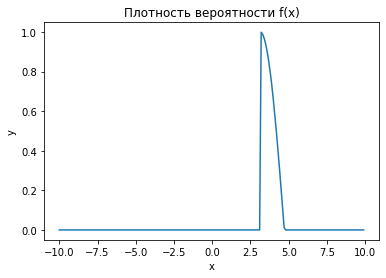

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def F(x):
    y = []
    for xi in x:
        if xi <= np.pi: 
            y.append(0)
        elif np.pi < xi <= np.pi* 3/2:
            y.append(-np.cos(xi))
        else: 
            y.append(0)
    return y
x = np.arange(-10, 10, 0.1)
plt.plot(x, F(x))
plt.title('Плотность вероятности f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Вероятность попадания случайной величины X в интервал $\left[\pi, \frac{5}{4} \pi\right]$ = 1, так как плотность распределения, равная 1 находится в интервале $\left[\pi, \frac{6}{4} \pi\right]$

Математическое ожидание - интегралы от $x*0 + x* (-cos(x)) + x*0 = Интеграл(x* (-cos(x)))  \left[\pi, \frac{3}{2} \pi\right]=(-x*cos(x) - sin(x)) \left[\pi, \frac{3}{2} \pi\right] = - \frac{3}{2} \pi * (0) - (-1) - (-\pi)*(-1) + 0 = 1-\pi$

In [23]:
def M(x):
  return (-x*np.cos(x) - np.sin(x))

def G(x):
  return (-(x**2 -2)* np.sin(x) - 2*x*np.cos(x))
m =  M(np.pi*3/2) - M(np.pi)

g = G(np.pi*3/2) - G(np.pi) - m**2
print(f'математическое ожидание = {m}, дисперсия = {g}')

математическое ожидание = -2.1415926535897922, дисперсия = 9.337005501361702


### Задание 5 [1.5 point]

 Случайная величина Х задана функцией распределения F(x).

 $$F(x)=\left\{\begin{array}{c}0, x \leq 1 \\ x-1,1<x \leq 2 \\ 1, x>2\end{array}\right.$$

 1. Является ли случайная величина Х непрерывной?

 2. имеет ли случайная величина Х плотность вероятности f(X)? Если имеет, найти ее. 
 3. постройте графики f(X) и F(X), если такое возможно.


1.случайная величина X явлется непрерывной т.к составлена из элементарных функций на непрерывной области определения, а по определению все элементарные функции являются непрерывными в любой точке свой области определения.

2. $$f(X) = F'(x)=\left\{\begin{array}{c}0, x \leq 1 \\ 1,1<x \leq 2 \\ 0, x>2\end{array}\right.$$

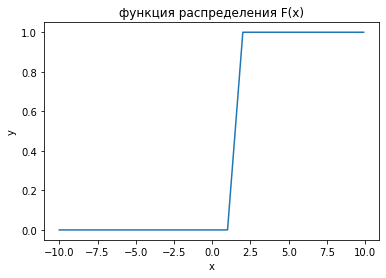

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def F(x):
    y = []
    for xi in x:
        if xi <= 1: 
            y.append(0)
        elif 1 < xi <= 2:
            y.append(xi-1)
        else: 
            y.append(1)
    return y
x = np.arange(-10, 10, 0.1)
plt.plot(x, F(x))
plt.title('функция распределения F(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

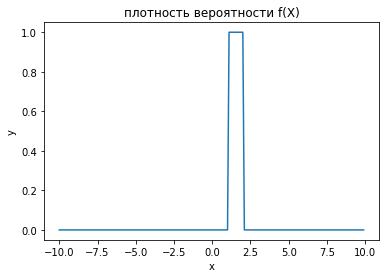

In [ ]:
def f(x):
    y = []
    for xi in x:
        if xi <= 1: 
            y.append(0)
        elif 1 < xi <= 2:
            y.append(1)
        else: 
            y.append(0)
    return y


x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))
plt.title('плотность вероятности f(X)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Задание 6

Рассмотрим несбалансированный набор данных с соотношением меньшего класса к большему 1: 100, где 100 экземпляров принадлежит меньшему классу, а 10 000 большему.

Модель ML делает прогнозы и предсказывает 120 примеров как принадлежащих к классу меньшинства, 90 из которых верны, а 30 - неверны.

Найти:

- Precision **[0.5 point]**
- Recall **[0.5 point]**
- $F_1$ метрику **[0.5 point]**

In [ ]:
TP,FP,FN = 90,30,120-100
precision = TP/(TP + FP)
recall =  TP/(TP + FN)
b = 1
fb = (1 + b**2)*precision*recall/(precision*b**2 + recall)
print(f'Precision= {precision}, Recall = {recall}, F1 = {fb}')

Precision= 0.75, Recall = 0.8181818181818182, F1 = 0.7826086956521738
